In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
directory = ''
ori_name = ['ACN.csv', 'AMZN.csv', 'CTSH.csv', 'FB.csv', 'GOOG.csv',
          'IBM.csv', 'INFY.csv', 'MSFT.csv', 'TCS.NS.csv', 'WIT.csv']
stocks = [directory + s for s in ori_name]
stocks

['ACN.csv',
 'AMZN.csv',
 'CTSH.csv',
 'FB.csv',
 'GOOG.csv',
 'IBM.csv',
 'INFY.csv',
 'MSFT.csv',
 'TCS.NS.csv',
 'WIT.csv']

In [0]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
0,178.330002,1869.000000,59.439999,185.300003,1162.300049,134.320007,10.17,128.070007,2095.449951,4.47
1,178.539993,1858.969971,59.990002,182.720001,1138.849976,135.119995,10.20,126.220001,2143.949951,4.58
2,179.570007,1857.520020,61.000000,184.820007,1149.630005,136.449997,10.18,126.900002,2109.750000,4.48
3,180.389999,1859.680054,61.500000,185.320007,1151.420044,136.350006,10.22,127.669998,2081.750000,4.46
4,178.270004,1815.479980,61.080002,180.869995,1140.770020,132.389999,10.16,126.180000,2054.050049,4.42


In [0]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [6]:
mean_daily_returns * 252

Close_x    0.101293
Close_y    0.321788
Close_x   -0.080167
Close_y    0.219622
Close_x    0.244607
Close_y   -0.079293
Close_x   -0.074989
Close_y    0.462374
Close_x   -0.051113
Close_y   -0.407720
dtype: float64

In [7]:
volatilities * 252

Close_x    5.916300
Close_y    5.047147
Close_x    7.121601
Close_y    6.386430
Close_x    5.802138
Close_y    5.859486
Close_x    6.763885
Close_y    6.347253
Close_x    5.381582
Close_y    5.015238
dtype: float64

In [0]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

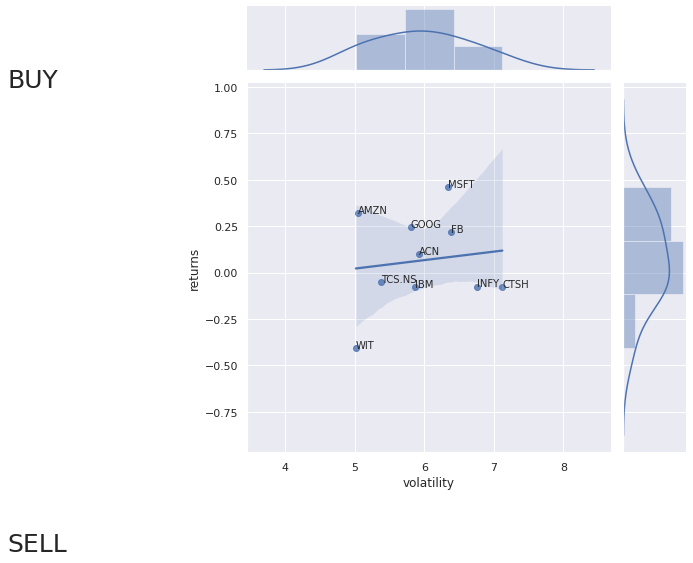

In [9]:
g = sns.jointplot("volatility", "returns", data=combine, kind="reg",height=7)

for i in range(combine.shape[0]):
    plt.annotate(ori_name[i].replace('.csv',''), (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(0, -1.5, 'SELL', fontsize=25)
plt.text(0, 1.0, 'BUY', fontsize=25)
    
plt.show()